In [1]:
import skimage
import numpy as np
import pandas as pd

from pathlib import Path
from scipy import ndimage
from skimage import transform
from matplotlib import pyplot as plt
pd.set_option('display.max_columns', 50)

In [2]:
DATA_PATH = "datasets/"
ICMC_PATH = "PessoasICMC/"
ORIGNAL_PATH = "OrlFaces20/"

In [3]:
def read_data(name, size=None):
    if size is None:
        print("The amount of images and their sizes must be specified")
        raise ValueError("size can not be None")
    
    data = np.ndarray(size)
    path = Path(name)
    
    for subdir in path.iterdir():
        class_num = int(subdir.name[1:]) - 1 # skip the "p/s" at the beggining
        for idx, img_file in enumerate(subdir.iterdir()):
            data[class_num, idx] = skimage.io.imread(img_file)            
    
    # Convert to numpy array
    data = np.array(data)
    amount_data = size[0]*size[1]
    data = data.reshape(amount_data, size[-2], size[-1])
    
    # Create the target vector
    targets = np.array([[x]*size[1] for x in range(1, 21)])
    targets = targets.reshape(-1)
    
    return data, targets

In [4]:
icmc_x, icmc_y = read_data(DATA_PATH + ICMC_PATH, size=(20, 1, 300, 200))
print(icmc_x.shape, icmc_y.shape, sep='\n')

(20, 300, 200)
(20,)


In [5]:
def data_augmentation(img):      
    imgs = []
    
    # Append the original image
    imgs.append(img)
    
    # Flip an array horizontally (axis=1)         
    imgs.append(np.fliplr(img))           

    # Flip an array vertically (axis=0)
    imgs.append(np.flipud(img))           

    # Blurred face
    imgs.append(ndimage.gaussian_filter(img, sigma=3))

    # Very blurred face
    imgs.append(ndimage.gaussian_filter(img, sigma=5))

    # Rotate -45º, +45º, -125º, +125º, 180º.
    for angle in [-45, 45, -125, 125, 180]:
        imgs.append(transform.rotate(img, angle=angle, mode="edge", cval=1, preserve_range=True))     
    
    return np.array(imgs)

In [6]:
new_icmc_x = []

[new_icmc_x.append(data_augmentation(icmc_x[class_num])) for class_num in range(icmc_y.size)]

new_icmc_x = np.array(new_icmc_x)

new_icmc_x.shape

(20, 10, 300, 200)

In [7]:
# Source: https://gist.github.com/soply/f3eec2e79c165e39c9d540e916142ae1
def show_images(images, cols = 1, titles = None):
    """Display a list of images in a single figure with matplotlib.
    
    Parameters
    ---------
    images: List of np.arrays compatible with plt.imshow.
    
    cols (Default = 1): Number of columns in figure (number of rows is 
                        set to np.ceil(n_images/float(cols))).
    
    titles: List of titles corresponding to each image. Must have
            the same length as titles.
    """
    assert((titles is None)or (len(images) == len(titles)))
    n_images = len(images)
    if titles is None: titles = ['Image (%d)' % i for i in range(1,n_images + 1)]
    fig = plt.figure()
    for n, (image, title) in enumerate(zip(images, titles)):
        a = fig.add_subplot(cols, np.ceil(n_images/float(cols)), n + 1)
        if image.ndim == 2:
            plt.gray()
        plt.imshow(image)
        a.set_title(title)
    fig.set_size_inches(np.array(fig.get_size_inches()) * n_images)
plt.show()

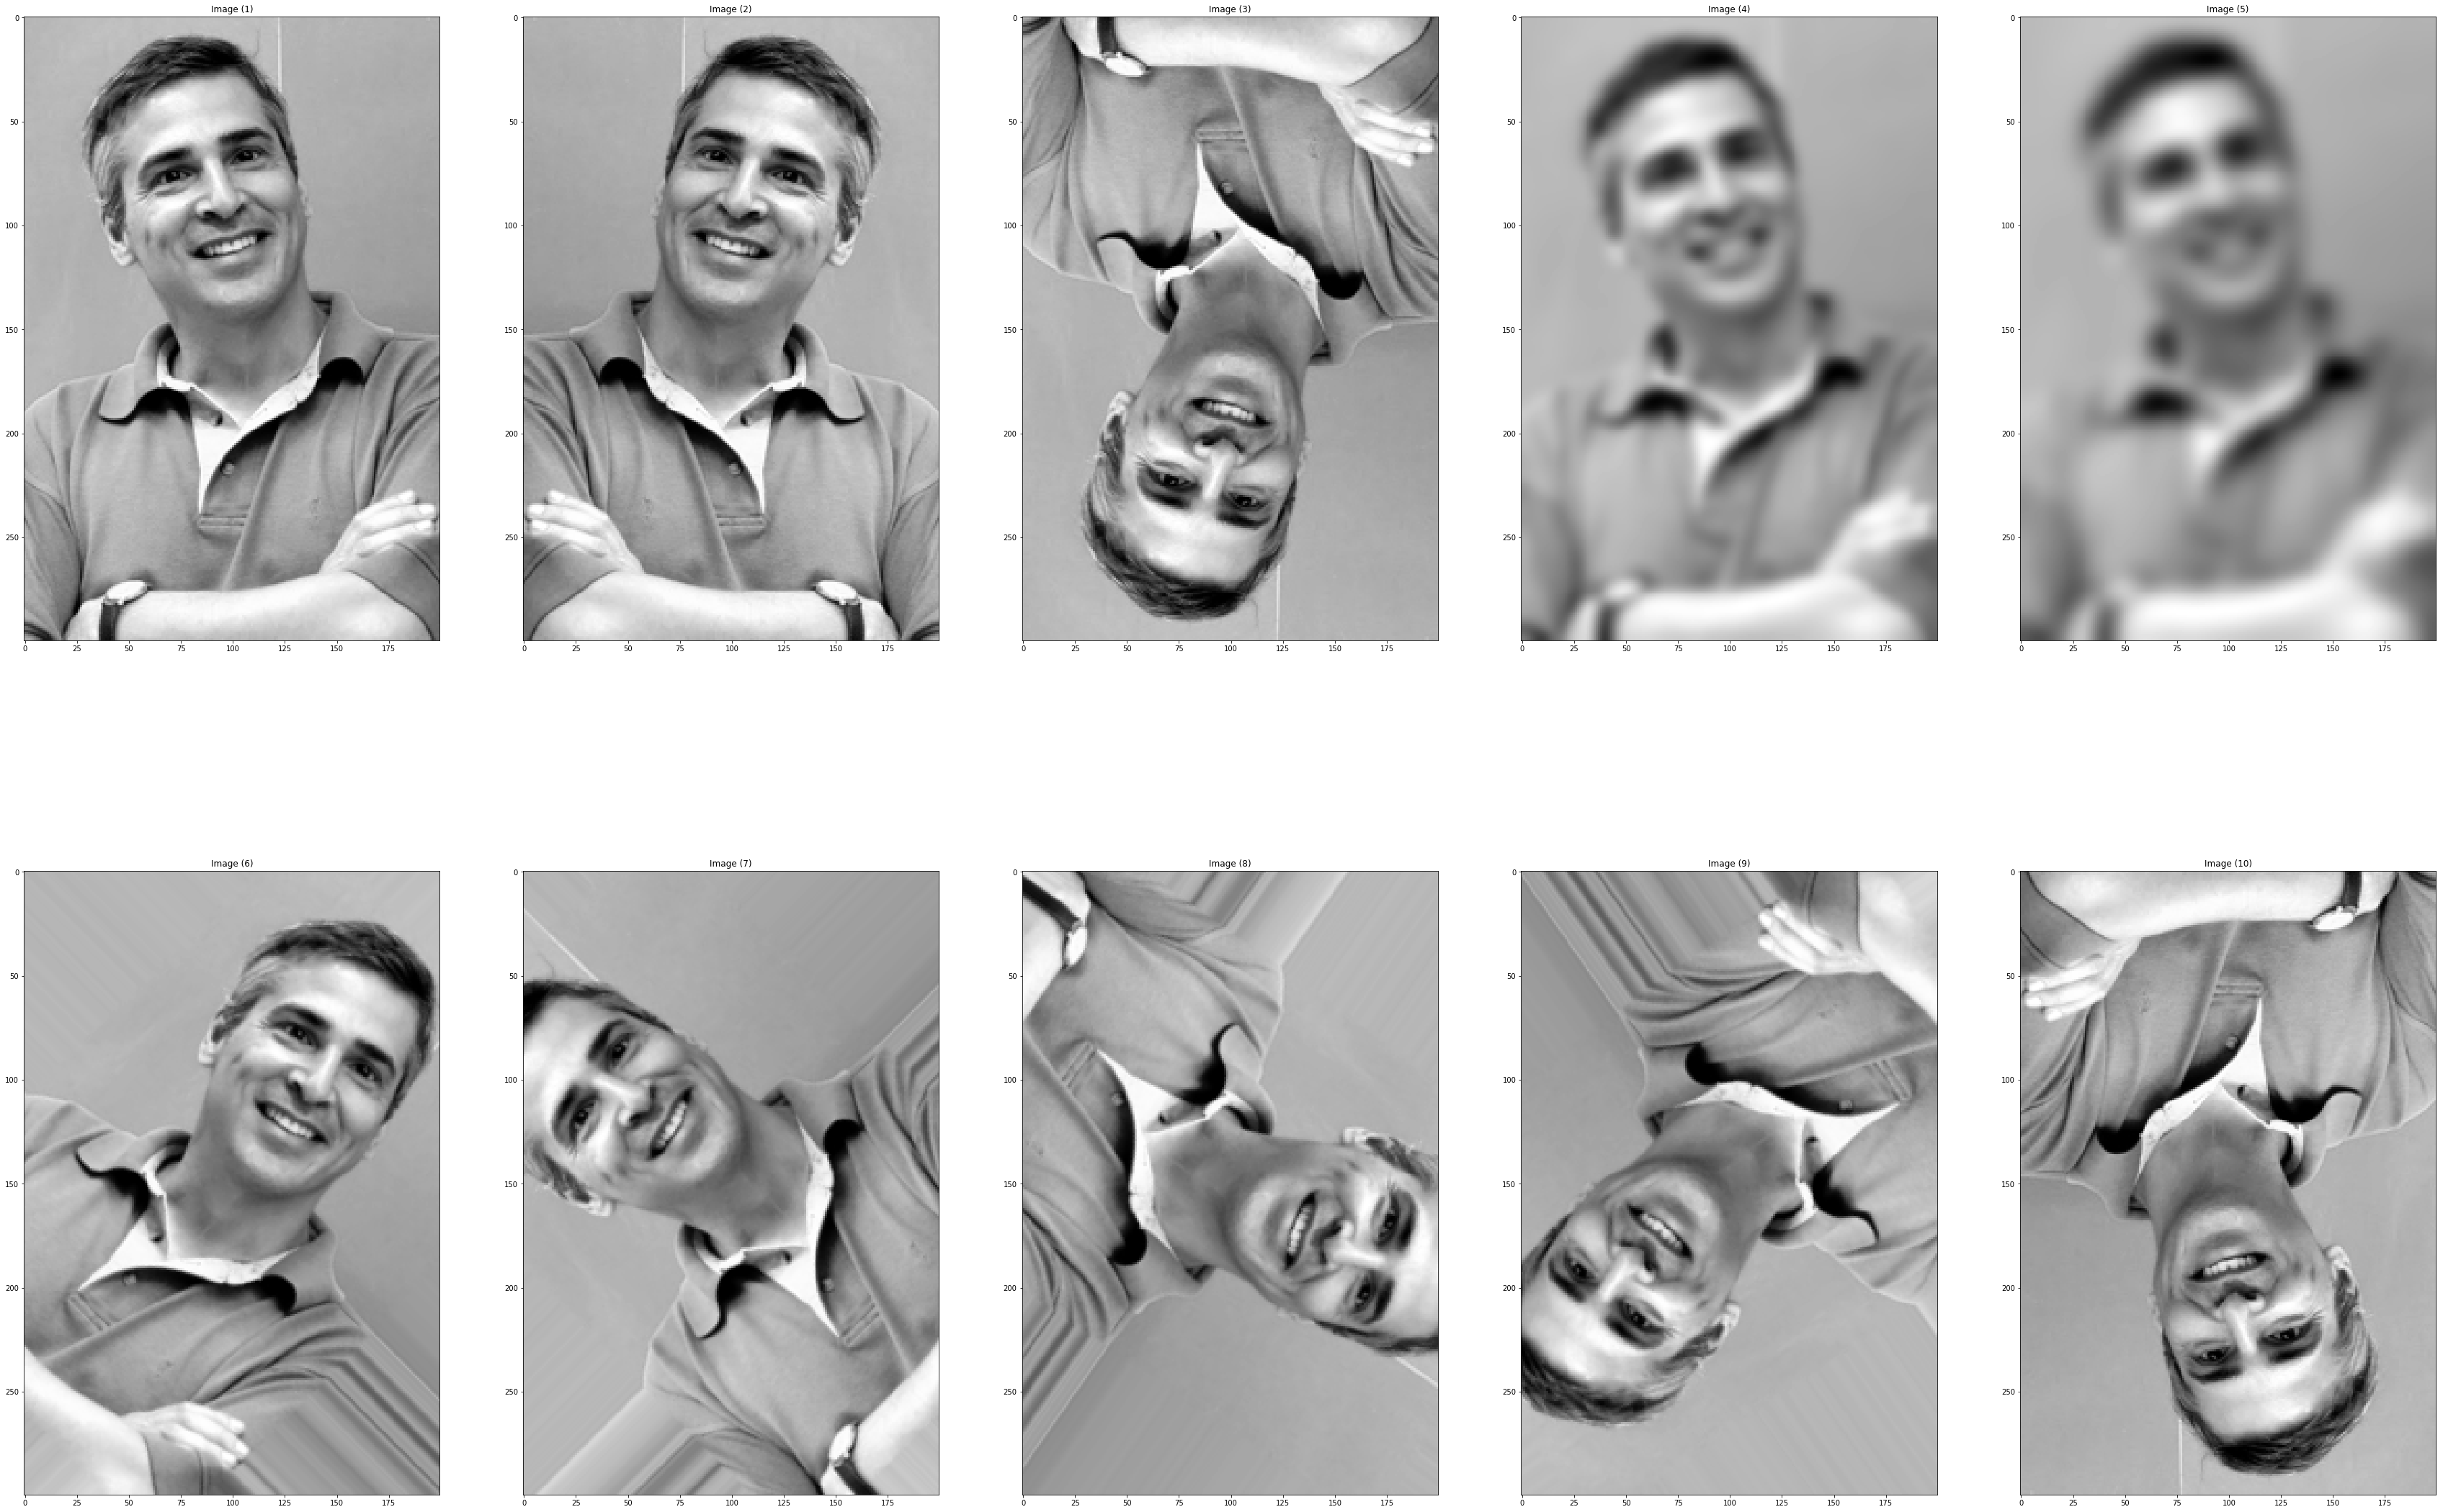

In [8]:
# Preview data augmentation
show_images(new_icmc_x[1], cols = 2, titles = None)

In [9]:
EXT="png"
SUB_FOLDER=DATA_PATH+"Augmented"+ICMC_PATH+"p"

def save_data(imgs):
    folders = sorted(np.arange(imgs.shape[0]).tolist()*imgs.shape[1])    
    idx_imgs = (np.arange(imgs.shape[1]).tolist()*imgs.shape[0])   
    
    [skimage.io.imsave(fname=f"{SUB_FOLDER}{i+1}/{j+1}.{EXT}", arr=imgs[i][j]) for i, j in zip(folders, idx_imgs)]

In [10]:
# Saving images to disc
save_data(new_icmc_x)

Lossy conversion from float64 to uint8. Range [3578.0, 65371.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [3578.0, 65371.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [3578.0, 65371.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [5096.348143262073, 57579.61103479573]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [5567.477016814474, 56518.53447849087]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [4275.972741882364, 64066.9488784061]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [4136.690160076545, 65175.47959482382]. Convert image to uint8 prior to saving to suppress this warning.
Lossy c

Lossy conversion from float64 to uint8. Range [225.752221368563, 65493.85566470307]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [1.5631940186722204e-12, 65535.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [437.0, 65203.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [437.0, 65203.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [437.0, 65203.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [4513.4962550640275, 64761.66460530048]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [5090.204250632559, 64578.376513929055]. Convert image to uint8 prior to saving to suppress this warning.
Lossy convers

Lossy conversion from float64 to uint8. Range [5714.327010694171, 65535.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [5804.594813742902, 65535.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [5627.689235204703, 65535.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [5468.0000000000455, 65535.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 65498.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 65498.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 65498.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [291.400

Lossy conversion from float64 to uint8. Range [11220.033537657437, 60313.66121215978]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [1479.5436649809064, 65210.49723536551]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [1479.5436649808958, 65210.49723536547]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [1831.6013261926896, 65131.91037305624]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [1711.0863915637167, 65082.12815690783]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [1029.0000000000268, 65441.99999999996]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [404.0, 65146.0]. Convert image to uint8 p